# Cogs 109: Modeling and Data Analysis
## Final project guidelines, 2019

Work in teams of at least 2 and no more than 4 students. Every student in the group will be expected to contribute substantially to the final product(s), and all students should be able to understand and explain all aspects of the project when you present your work in the final symposium.

Your project should. 
- Identify a real problem, challenge or scientific question which could benefit from data analysis and modeling. Your final report must explain why the question is interesting or important. 
- Identify a relevant data set. You should learn about how the data was collected and be able to explain key features of the data, for example: How many observations? What are the noise sources? What are the relevant predictors?
Identify at least one relevant data analysis approach, choosing from the methods covered in the course (linear or nonlinear regression, classification, clustering, PCA, etc.). Explain why this analysis approach is appropriate for addressing your question.
- Identify and explain one or more hypotheses or initial expectation that you will test using the data.
- Model selection: You should compare and contrast multiple different models (at least 2, but usually more). Your comparison should make use of cross-validation, bootstrap sampling, regularization, and/or other relevant techniques. For example, you might compare K-Nearest Neighbors classification for a range of k values (k=1,2,…,50), and select the k value that provides the lowest test set (cross-validation) error.
- Model estimation: Implement your data analysis and present the results using a combination of data visualizations (box plots, scatter plots), statistical analyses and models.
- Present your conclusions and outlook for next steps/future directions.

The final product will be a written report, 5-10 pages in length. In addition, you will create a poster explaining your project to be presented in a symposium session on the last day of class. We will provide more information about the final paper and poster in a few weeks.


## Written report:
Your final report must include the following sections (use these headings).
- Introduction. 
    - Define the real problem and explain its motivation
    - Identify the dataset you will use and explain its key characteristics.
    - Explain at least one hypothesis that you will test.
- Methods. Identify the data analysis approach you will use and explain the rationale/motivation for your choice of this approach.
- Results
    - Model selection. You MUST compare at least 2 models, using cross-validation, regularization, and/or other relevant techniques.
    - Model estimation. What are the final parameter estimates? What is the final accuracy of the model’s predictions?
    - Conclusions and discussion. What can you conclude about your hypothesis? (Note that negative or ambiguous results are perfectly acceptable, you just need to explain what you found.) What are some potential implications/next steps for researchers interested in this topic?


In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import linalg
from sklearn.linear_model import Ridge
from pytrends.request import TrendReq

In [2]:
companies = ['tesla', 'facebook', 'microsoft', 'amazon', 'google', 'uber', 'lyft', 'apple', 'snap']
key_terms = ['report', 'good', 'bad', 'up', 'down', 'stock']
company_symbol = ['TSLA', 'FB', 'MSFT', 'AMZN', 'GOOGL', 'UBER', 'LYFT', 'AAPL', 'SNAP']

In [3]:
#create kw_list 
kw_list = []
for c_name in companies:
    for k in key_terms:
        kw_list.append(c_name + " " + k)

In [4]:
df = pd.DataFrame()
print(df.empty)
pytrends = TrendReq(hl='en-US', tz=360)
for kw in kw_list:
    pytrends.build_payload([kw], cat=0, timeframe='today 3-m', geo='', gprop='')
    df_temp = pytrends.interest_over_time()
    df_temp = df_temp.drop(['isPartial'], axis=1)
    print(df_temp.columns)
    if df.empty:
        df = df_temp
    else:
        df = df.join(df_temp)

True
Index(['tesla report'], dtype='object')
Index(['tesla good'], dtype='object')
Index(['tesla bad'], dtype='object')
Index(['tesla up'], dtype='object')
Index(['tesla down'], dtype='object')
Index(['tesla stock'], dtype='object')
Index(['facebook report'], dtype='object')
Index(['facebook good'], dtype='object')
Index(['facebook bad'], dtype='object')
Index(['facebook up'], dtype='object')
Index(['facebook down'], dtype='object')
Index(['facebook stock'], dtype='object')
Index(['microsoft report'], dtype='object')
Index(['microsoft good'], dtype='object')
Index(['microsoft bad'], dtype='object')
Index(['microsoft up'], dtype='object')
Index(['microsoft down'], dtype='object')
Index(['microsoft stock'], dtype='object')
Index(['amazon report'], dtype='object')
Index(['amazon good'], dtype='object')
Index(['amazon bad'], dtype='object')
Index(['amazon up'], dtype='object')
Index(['amazon down'], dtype='object')
Index(['amazon stock'], dtype='object')
Index(['google report'], dtype='obj

In [5]:
print(df.shape)

(90, 54)


In [6]:
# get tsla stock for last 7 days
ts = 'TIME_SERIES_DAILY'
api_key = ''

outputsize = 'compact'
df_stocks = {}
for i, symbol in enumerate(company_symbol):
    link = 'https://www.alphavantage.co/query?function={}&symbol={}&apikey={}&outputsize={}'\
            .format(ts, symbol, api_key, outputsize)
    r = requests.get(link)
    data = json.loads(r.text)
    print(data)
    if "Time Series (Daily)" not in data:
        break
    stock_data_per_day = json.dumps(data["Time Series (Daily)"])
    df_temp = pd.read_json(stock_data_per_day).transpose()
    df_temp.reset_index(level=0, inplace=True)
    df_temp.columns = ['times', 'open', 'high', 'low', 'close', 'volume']
    df_stocks[companies[i]] = df_temp
print(df_stocks['tesla'])

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'TSLA', '3. Last Refreshed': '2019-11-27', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2019-11-27': {'1. open': '331.1200', '2. high': '333.9300', '3. low': '328.5700', '4. close': '331.2900', '5. volume': '5530242'}, '2019-11-26': {'1. open': '335.2700', '2. high': '335.5000', '3. low': '327.1000', '4. close': '328.9200', '5. volume': '7956239'}, '2019-11-25': {'1. open': '344.3200', '2. high': '344.5700', '3. low': '334.4600', '4. close': '336.3400', '5. volume': '12345765'}, '2019-11-22': {'1. open': '340.1600', '2. high': '341.0000', '3. low': '330.0000', '4. close': '333.0400', '5. volume': '16870642'}, '2019-11-21': {'1. open': '354.5100', '2. high': '360.8400', '3. low': '354.0039', '4. close': '354.8300', '5. volume': '6110013'}, '2019-11-20': {'1. open': '360.0000', '2. high': '361.2000', '3. low': '349.5700', '4. close': '352.2200', '5. v

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'FB', '3. Last Refreshed': '2019-11-27', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2019-11-27': {'1. open': '199.9000', '2. high': '203.1400', '3. low': '199.4200', '4. close': '202.0000', '5. volume': '13043916'}, '2019-11-26': {'1. open': '200.0000', '2. high': '200.1500', '3. low': '198.0387', '4. close': '198.9700', '5. volume': '11748664'}, '2019-11-25': {'1. open': '199.5150', '2. high': '200.9700', '3. low': '199.2500', '4. close': '199.7900', '5. volume': '15286442'}, '2019-11-22': {'1. open': '198.3800', '2. high': '199.3000', '3. low': '197.6200', '4. close': '198.8200', '5. volume': '9959817'}, '2019-11-21': {'1. open': '197.4200', '2. high': '199.0900', '3. low': '196.8600', '4. close': '197.9300', '5. volume': '12130985'}, '2019-11-20': {'1. open': '198.5800', '2. high': '199.5900', '3. low': '195.4300', '4. close': '197.5100', '5. v

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'MSFT', '3. Last Refreshed': '2019-11-27', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2019-11-27': {'1. open': '152.3300', '2. high': '152.5000', '3. low': '151.5200', '4. close': '152.3200', '5. volume': '15123806'}, '2019-11-26': {'1. open': '151.3600', '2. high': '152.4200', '3. low': '151.3200', '4. close': '152.0300', '5. volume': '24635100'}, '2019-11-25': {'1. open': '150.0000', '2. high': '151.3500', '3. low': '149.9200', '4. close': '151.2300', '5. volume': '22428585'}, '2019-11-22': {'1. open': '150.0700', '2. high': '150.3000', '3. low': '148.8200', '4. close': '149.5900', '5. volume': '15841680'}, '2019-11-21': {'1. open': '149.4000', '2. high': '149.8000', '3. low': '148.5010', '4. close': '149.4800', '5. volume': '18576083'}, '2019-11-20': {'1. open': '150.3100', '2. high': '150.8400', '3. low': '148.4600', '4. close': '149.6200', '5

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'AMZN', '3. Last Refreshed': '2019-11-27', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2019-11-27': {'1. open': '1801.0000', '2. high': '1824.5000', '3. low': '1797.3100', '4. close': '1818.5100', '5. volume': '2937653'}, '2019-11-26': {'1. open': '1779.9200', '2. high': '1797.0300', '3. low': '1778.3500', '4. close': '1796.9400', '5. volume': '3190428'}, '2019-11-25': {'1. open': '1753.2500', '2. high': '1777.4200', '3. low': '1753.2400', '4. close': '1773.8400', '5. volume': '3489467'}, '2019-11-22': {'1. open': '1739.0200', '2. high': '1746.4300', '3. low': '1731.0000', '4. close': '1745.7200', '5. volume': '2479081'}, '2019-11-21': {'1. open': '1743.0000', '2. high': '1746.8700', '3. low': '1730.3600', '4. close': '1734.7100', '5. volume': '2662938'}, '2019-11-20': {'1. open': '1749.1400', '2. high': '1762.5200', '3. low': '1734.1200', '4. clos

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'GOOGL', '3. Last Refreshed': '2019-11-27', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2019-11-27': {'1. open': '1315.4200', '2. high': '1317.6400', '3. low': '1309.4700', '4. close': '1312.1300', '5. volume': '844080'}, '2019-11-26': {'1. open': '1309.9100', '2. high': '1314.0100', '3. low': '1304.0400', '4. close': '1313.0000', '5. volume': '1097089'}, '2019-11-25': {'1. open': '1296.2600', '2. high': '1310.4100', '3. low': '1295.6100', '4. close': '1305.6400', '5. volume': '1179658'}, '2019-11-22': {'1. open': '1303.0000', '2. high': '1306.9000', '3. low': '1289.3600', '4. close': '1293.6700', '5. volume': '1388912'}, '2019-11-21': {'1. open': '1299.2500', '2. high': '1311.1200', '3. low': '1290.7500', '4. close': '1300.1400', '5. volume': '1277338'}, '2019-11-20': {'1. open': '1311.3600', '2. high': '1313.2100', '3. low': '1289.2100', '4. clos

{'Note': 'Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.'}
        times    open    high       low   close      volume
0  2019-11-27  331.12  333.93  328.5700  331.29   5530242.0
1  2019-11-26  335.27  335.50  327.1000  328.92   7956239.0
2  2019-11-25  344.32  344.57  334.4600  336.34  12345765.0
3  2019-11-22  340.16  341.00  330.0000  333.04  16870642.0
4  2019-11-21  354.51  360.84  354.0039  354.83   6110013.0
..        ...     ...     ...       ...     ...         ...
95 2019-07-16  249.30  253.53  247.9325  252.38   8148989.0
96 2019-07-15  248.00  254.42  244.8600  253.50  11000092.0
97 2019-07-12  239.75  245.38  239.7100  245.08   9200521.0
98 2019-07-11  238.14  241.50  235.8000  238.60   7514430.0
99 2019-07-10  234.15  238.94  233.1400  238.92   9145736.0

[100 rows x 6 columns]


In [7]:
df.head()

,tesla report,tesla good,tesla bad,tesla up,tesla down,tesla stock,facebook report,facebook good,facebook bad,facebook up,...,apple bad,apple up,apple down,apple stock,snap report,snap good,snap bad,snap up,snap down,snap stock
date,,,,,,,,,,,,,,,,,,,,,
2019-08-28,13,15,7,3,26,16,81,74,92,47,...,70,49,42,38,54,61,75,61,20,23
2019-08-29,10,19,11,2,20,15,88,77,78,47,...,54,47,31,39,42,70,56,68,24,25
2019-08-30,13,13,11,3,20,18,74,88,73,52,...,67,47,51,39,37,63,46,75,20,22
2019-08-31,17,13,8,2,22,8,66,80,97,47,...,64,44,36,13,41,48,67,58,15,7
2019-09-01,6,10,8,3,11,4,81,80,91,46,...,72,50,42,10,40,42,93,61,17,2


In [8]:
df_stocks['tesla'].head()
print(len(df_stocks))

5


In [9]:
#reverse df rows
df = df.iloc[::-1]
df.head()

,tesla report,tesla good,tesla bad,tesla up,tesla down,tesla stock,facebook report,facebook good,facebook bad,facebook up,...,apple bad,apple up,apple down,apple stock,snap report,snap good,snap bad,snap up,snap down,snap stock
date,,,,,,,,,,,,,,,,,,,,,
2019-11-25,34,57,64,35,69,56,75,81,81,45,...,78,50,56,47,63,58,71,74,17,19
2019-11-24,27,70,33,44,71,36,66,65,82,46,...,79,53,61,15,19,55,56,88,24,2
2019-11-23,44,66,90,63,100,52,57,80,65,48,...,63,50,45,17,49,66,49,93,22,4
2019-11-22,71,100,100,100,90,100,88,78,69,42,...,83,52,46,48,48,84,44,77,22,28
2019-11-21,25,24,9,15,34,26,70,77,85,49,...,69,52,41,45,41,78,44,81,19,26


In [10]:
tesla_names = [x for x in list(df.columns.values) if 'tesla' in x]
df_tesla_trends = df[tesla_names]

In [11]:
stock_times = df_stocks['tesla'].times
trends_times = list(df_tesla_trends.index)
joint_times = list(set(stock_times) & set(trends_times)) 

In [12]:
df_stocks['tesla'] = df_stocks['tesla'].loc[df_stocks['tesla']['times'].isin(joint_times)]
df_stocks['tesla'] = df_stocks['tesla'].reset_index()
print(df_stocks['tesla'].head())
df_tesla_trends = df_tesla_trends.loc[df_tesla_trends.index.isin(joint_times)]
df_tesla_trends = df_tesla_trends.reset_index()
df_tesla_trends.columns = ['_'.join(x.split()) for x in list(df_tesla_trends.columns) if len(x) > 1]
print(df_tesla_trends.head())

   index      times    open    high       low   close      volume
0      2 2019-11-25  344.32  344.57  334.4600  336.34  12345765.0
1      3 2019-11-22  340.16  341.00  330.0000  333.04  16870642.0
2      4 2019-11-21  354.51  360.84  354.0039  354.83   6110013.0
3      5 2019-11-20  360.00  361.20  349.5700  352.22   6733965.0
4      6 2019-11-19  351.75  359.99  347.8000  359.52   7736078.0
        date  tesla_report  tesla_good  tesla_bad  tesla_up  tesla_down  \
0 2019-11-25            34          57         64        35          69   
1 2019-11-22            71         100        100       100          90   
2 2019-11-21            25          24          9        15          34   
3 2019-11-20            22          13         13         5          21   
4 2019-11-19             7          14         19         6          36   

   tesla_stock  
0           56  
1          100  
2           26  
3           23  
4           23  


In [13]:
df_tesla = df_tesla_trends.join(df_stocks['tesla'])

In [14]:
df_tesla['profit'] = df_tesla['open']-df_tesla['close']
df_tesla = df_tesla.iloc[::-1]
df_tesla.head()

,date,tesla_report,tesla_good,tesla_bad,tesla_up,tesla_down,tesla_stock,index,times,open,high,low,close,volume,profit
62,2019-08-28,13,15,7,3,26,16,64,2019-08-28,213.69,217.25,212.310,215.59,3223082.0,-1.90
61,2019-08-29,10,19,11,2,20,15,63,2019-08-29,219.00,223.40,218.000,221.71,5183104.0,-2.71
60,2019-08-30,13,13,11,3,20,18,62,2019-08-30,229.15,232.44,224.213,225.61,9327775.0,3.54
59,2019-09-03,10,12,11,3,48,16,61,2019-09-03,224.08,228.95,223.160,225.01,5360546.0,-0.93
58,2019-09-04,18,21,13,3,37,16,60,2019-09-04,226.89,228.46,219.205,220.68,5768696.0,6.21


In [15]:
# Split into training and testing data
df_tesla_train = df_tesla[:50]
print(df_tesla_train.shape)
df_tesla_test = df_tesla[50:]
print(df_tesla_test.shape)

(50, 15)
(13, 15)


In [16]:
mdl=sm.formula.ols(formula='profit ~ 1 + tesla_report + tesla_good + tesla_bad + tesla_up + tesla_down', data=df_tesla_train).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.6842
Date:                Wed, 27 Nov 2019   Prob (F-statistic):              0.638
Time:                        22:25:39   Log-Likelihood:                -161.03
No. Observations:                  50   AIC:                             334.1
Df Residuals:                      44   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.4852      5.923     -0.588      0.559     -15.422       8.451
tesla_report     0.0052      0.070      0.074      0.941      -0.136       0.146
tesla_good      -0.1046      0.249     -0.421      0.676      -0.606       0.397
tesla_bad        0.3298      0.214      1.543      0.130      -0.101       0.761
tesla_up        -0.7795      0.941     -0.829      0.412      -2.675       1.116
tesla_down       0.1171      0.119      0.988      0.329      -0.122       0.356
==============================================================================
Omnibus:                       34.406   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.485
Skew:                          -1.627   Prob(JB):                     3.12e-31
Kurtosis:                      10.539   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
mdl=sm.formula.ols(formula='close ~ 1 + tesla_report + tesla_good + tesla_bad + tesla_up + tesla_down', data=df_tesla_train).fit()
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     4.634
Date:                Wed, 27 Nov 2019   Prob (F-statistic):            0.00175
Time:                        22:25:39   Log-Likelihood:                -234.62
No. Observations:                  50   AIC:                             481.2
Df Residuals:                      44   BIC:                             492.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      217.8135     25.806      8.441      0.000     165.806     269.821
tesla_report    -0.3078      0.305     -1.010      0.318      -0.922       0.306
tesla_good      -1.6712      1.084     -1.542      0.130      -3.855       0.513
tesla_bad        1.5751      0.932      1.691      0.098      -0.302       3.453
tesla_up        15.9114      4.099      3.882      0.000       7.651      24.172
tesla_down      -0.2270      0.516     -0.440      0.662      -1.268       0.814
==============================================================================
Omnibus:                        7.560   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.826
Skew:                           0.882   Prob(JB):                       0.0329
Kurtosis:                       3.405   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
cols = ['tesla_report', 'tesla_good', 'tesla_bad', 'tesla_up', 'tesla_down']

In [19]:
#ridge regression
X = df_tesla_train[cols]
y = df_tesla_train['profit']
alpha = []
MSE_train = []
MSE_test = []
for i in range(90, 1000, 10):
    clf = Ridge(alpha=i)
    clf.fit(X, y) 
    print("alpha: "+str(i))
    print("Training error = "+str(mean_squared_error(clf.predict(df_tesla_train[cols]), df_tesla_train['profit'])))
    print("Testing error = "+str(mean_squared_error(clf.predict(df_tesla_test[cols]), df_tesla_test['profit'])))
    print()
    alpha.append(i)
    MSE_train.append(mean_squared_error(clf.predict(df_tesla_train[cols]), df_tesla_train['profit']))
    MSE_test.append(mean_squared_error(clf.predict(df_tesla_test[cols]), df_tesla_test['profit']))

alpha: 90
Training error = 36.98822569108048
Testing error = 30.45522977305298

alpha: 100
Training error = 37.01017072352085
Testing error = 27.95226039540373

alpha: 110
Training error = 37.03051329058513
Testing error = 26.09270113211755

alpha: 120
Training error = 37.049477240414106
Testing error = 24.69981215567142

alpha: 130
Training error = 37.067252215487954
Testing error = 23.650140796876073

alpha: 140
Training error = 37.083998192476855
Testing error = 22.855883011143103

alpha: 150
Training error = 37.09985001639799
Testing error = 22.253597958430436

alpha: 160
Training error = 37.11492148334835
Testing error = 21.79681148141036

alpha: 170
Training error = 37.12930884834209
Testing error = 21.451063838129524

alpha: 180
Training error = 37.143093769341505
Testing error = 21.190530256532142

alpha: 190
Training error = 37.156345748865334
Testing error = 20.995675096887314

alpha: 200
Training error = 37.16912414759615
Testing error = 20.851598263258516

alpha: 210
Traini

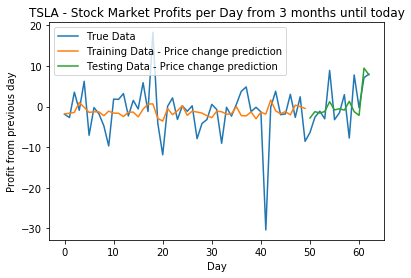

In [20]:
#plot data with training and test data
clf = Ridge(alpha=510)
clf.fit(X, y) 
plt.plot(range(len(df_tesla['profit'])) , df_tesla["profit"], range(50), clf.predict(df_tesla_train[cols]), '-', range(50, len(df_tesla['profit'])), clf.predict(df_tesla_test[cols]), '-')
plt.xlabel('Day')
plt.ylabel('Profit from previous day')
plt.title('TSLA - Stock Market Profits per Day from 3 months until today')
plt.legend(["True Data","Training Data - Price change prediction", "Testing Data - Price change prediction"])
plt.show()

In [21]:
#ridge regression
X = df_tesla_train[cols]
y = df_tesla_train['close']
clf = Ridge(alpha=510.0)
clf.fit(X, y) 
print("Training error = "+str(mean_squared_error(clf.predict(df_tesla_train[cols]), df_tesla_train['close'])))
print("Testing error = "+str(mean_squared_error(clf.predict(df_tesla_test[cols]), df_tesla_test['close'])))

Training error = 913.7044696572359
Testing error = 7492.645514261195


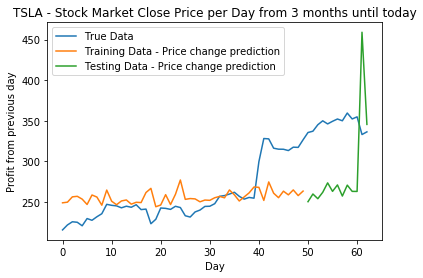

In [22]:
#plot data with training and test data
clf = Ridge(alpha=510)
clf.fit(X, y) 
plt.plot(range(len(df_tesla['close'])) , df_tesla["close"], range(50), clf.predict(df_tesla_train[cols]), '-', range(50, len(df_tesla['close'])), clf.predict(df_tesla_test[cols]), '-')
plt.xlabel('Day')
plt.ylabel('Profit from previous day')
plt.title('TSLA - Stock Market Close Price per Day from 3 months until today')
plt.legend(["True Data","Training Data - Price change prediction", "Testing Data - Price change prediction"])
plt.show()

In [23]:
df_stocks['facebook'].head()

,times,open,high,low,close,volume
0,2019-11-27,199.900,203.14,199.4200,202.00,13043916.0
1,2019-11-26,200.000,200.15,198.0387,198.97,11748664.0
2,2019-11-25,199.515,200.97,199.2500,199.79,15286442.0
3,2019-11-22,198.380,199.30,197.6200,198.82,9959817.0
4,2019-11-21,197.420,199.09,196.8600,197.93,12130985.0


In [24]:
fb_names = [x for x in list(df.columns.values) if 'facebook' in x]
df_fb_trends = df[fb_names]
stock_times = df_stocks['facebook'].times
trends_times = list(df_fb_trends.index)
joint_times = list(set(stock_times) & set(trends_times)) 
df_stocks['facebook'] = df_stocks['facebook'].loc[df_stocks['facebook']['times'].isin(joint_times)]
df_stocks['facebook'] = df_stocks['facebook'].reset_index()
print(df_stocks['facebook'].head())
df_fb_trends = df_fb_trends.loc[df_fb_trends.index.isin(joint_times)]
df_fb_trends = df_fb_trends.reset_index()
df_fb_trends.columns = ['_'.join(x.split()) for x in list(df_fb_trends.columns) if len(x) > 1]
print(df_fb_trends.head())
df_fb = df_fb_trends.join(df_stocks['facebook'])
df_fb['profit'] = df_fb['open']-df_fb['close']
df_fb = df_fb.iloc[::-1]
df_fb.head()

   index      times     open    high     low   close      volume
0      2 2019-11-25  199.515  200.97  199.25  199.79  15286442.0
1      3 2019-11-22  198.380  199.30  197.62  198.82   9959817.0
2      4 2019-11-21  197.420  199.09  196.86  197.93  12130985.0
3      5 2019-11-20  198.580  199.59  195.43  197.51  12370240.0
4      6 2019-11-19  197.400  200.00  196.86  199.32  19070291.0
        date  facebook_report  facebook_good  facebook_bad  facebook_up  \
0 2019-11-25               75             81            81           45   
1 2019-11-22               88             78            69           42   
2 2019-11-21               70             77            85           49   
3 2019-11-20               84             75            72           50   
4 2019-11-19               88             99            90           45   

   facebook_down  facebook_stock  
0             48              60  
1             45              56  
2             49              62  
3             55   

,date,facebook_report,facebook_good,facebook_bad,facebook_up,facebook_down,facebook_stock,index,times,open,high,low,close,volume,profit
62,2019-08-28,81,74,92,47,55,57,64,2019-08-28,180.53,181.9500,178.9200,181.76,9364533.0,-1.23
61,2019-08-29,88,77,78,47,60,61,63,2019-08-29,183.77,186.0752,183.4700,185.57,10135033.0,-1.80
60,2019-08-30,74,88,73,52,59,58,62,2019-08-30,186.78,186.8017,183.4585,185.67,10785722.0,1.11
59,2019-09-03,88,78,76,46,54,48,61,2019-09-03,184.00,185.6700,182.1100,182.39,9792187.0,1.61
58,2019-09-04,85,90,81,52,57,65,60,2019-09-04,184.65,187.7494,183.8900,187.14,11314571.0,-2.49


In [25]:
cols = ['facebook_'+ x for x in key_terms]
print(cols)

['facebook_report', 'facebook_good', 'facebook_bad', 'facebook_up', 'facebook_down', 'facebook_stock']


In [26]:
# Split into training and testing data
df_fb_train = df_fb[:50]
print(df_fb_train.shape)
df_fb_test = df_fb[50:]
print(df_fb_test.shape)

(50, 15)
(13, 15)


In [27]:
#ridge regression
X = df_fb_train[cols]
y = df_fb_train['profit']
alpha = []
MSE_train = []
MSE_test = []
for i in range(90, 1000, 10):
    clf = Ridge(alpha=i)
    clf.fit(X, y) 
    print("alpha: "+str(i))
    print("Training error = "+str(mean_squared_error(clf.predict(df_fb_train[cols]), df_fb_train['profit'])))
    print("Testing error = "+str(mean_squared_error(clf.predict(df_fb_test[cols]), df_fb_test['profit'])))
    print()
    alpha.append(i)
    MSE_train.append(mean_squared_error(clf.predict(df_fb_train[cols]), df_fb_train['profit']))
    MSE_test.append(mean_squared_error(clf.predict(df_fb_test[cols]), df_fb_test['profit']))

alpha: 90
Training error = 5.7325780274696685
Testing error = 3.2733939956569977

alpha: 100
Training error = 5.733031220581743
Testing error = 3.2724583740654793

alpha: 110
Training error = 5.733521081124204
Testing error = 3.2716180145971787

alpha: 120
Training error = 5.734045860826468
Testing error = 3.270868597106272

alpha: 130
Training error = 5.734603890209066
Testing error = 3.2702059966582104

alpha: 140
Training error = 5.735193574711446
Testing error = 3.2696262738803066

alpha: 150
Training error = 5.735813391031305
Testing error = 3.2691256658422105

alpha: 160
Training error = 5.73646188366266
Testing error = 3.2687005774340046

alpha: 170
Training error = 5.737137661620677
Testing error = 3.2683475732118366

alpha: 180
Training error = 5.737839395342098
Testing error = 3.2680633696829906

alpha: 190
Training error = 5.73856581375082
Testing error = 3.2678448280041743

alpha: 200
Training error = 5.739315701478875
Testing error = 3.267688947068517

alpha: 210
Training 

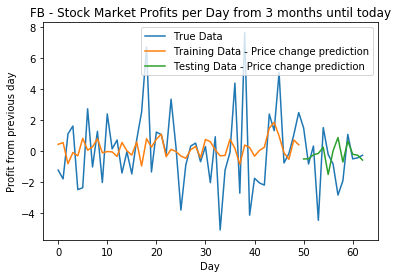

In [28]:
#plot data with training and test data
X = df_fb_train[cols]
y = df_fb_train['profit']
clf = Ridge(alpha=510)
clf.fit(X, y) 
plt.plot(range(len(df_fb['profit'])) , df_fb["profit"], range(50), clf.predict(df_fb_train[cols]), '-', range(50, len(df_fb['profit'])), clf.predict(df_fb_test[cols]), '-')
plt.xlabel('Day')
plt.ylabel('Profit from previous day')
plt.title('FB - Stock Market Profits per Day from 3 months until today')
plt.legend(["True Data","Training Data - Price change prediction", "Testing Data - Price change prediction"])
plt.show()

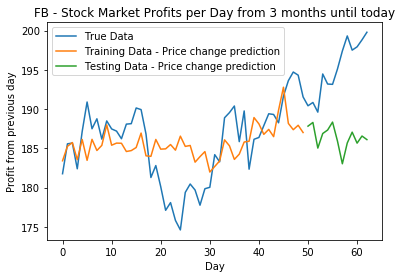

In [29]:
X = df_fb_train[cols]
y = df_fb_train['close']
clf = Ridge(alpha=510)
clf.fit(X, y) 
plt.plot(range(len(df_fb['close'])) , df_fb["close"], range(50), clf.predict(df_fb_train[cols]), '-', range(50, len(df_fb['close'])), clf.predict(df_fb_test[cols]), '-')
plt.xlabel('Day')
plt.ylabel('Profit from previous day')
plt.title('FB - Stock Market Profits per Day from 3 months until today')
plt.legend(["True Data","Training Data - Price change prediction", "Testing Data - Price change prediction"])
plt.show()

In [30]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [31]:
cols = ['facebook_'+ x for x in key_terms]
df_fb['mid'] = (df_fb['high'] + df_fb['low'])/2
df_fb[cols+['mid']]

,facebook_report,facebook_good,facebook_bad,facebook_up,facebook_down,facebook_stock,mid
62,81,74,92,47,55,57,180.4350
61,88,77,78,47,60,61,184.7726
60,74,88,73,52,59,58,185.1301
59,88,78,76,46,54,48,183.8900
58,85,90,81,52,57,65,185.8197
...,...,...,...,...,...,...,...
4,88,99,90,45,69,67,198.4300
3,84,75,72,50,55,67,197.5100
2,70,77,85,49,49,62,197.9750
1,88,78,69,42,45,56,198.4600


In [32]:
#scale data to be between 0-1 
sc = MinMaxScaler(feature_range = (0, 1))
data_set_scaled = sc.fit_transform(df_fb[cols+['mid']])
print(data_set_scaled)

[[0.38709677 0.28571429 0.90625    0.0862069  0.26229508 0.25862069
  0.22233202]
 [0.61290323 0.37142857 0.46875    0.0862069  0.3442623  0.32758621
  0.39377866]
 [0.16129032 0.68571429 0.3125     0.17241379 0.32786885 0.27586207
  0.40790909]
 [0.61290323 0.4        0.40625    0.06896552 0.24590164 0.10344828
  0.35889328]
 [0.51612903 0.74285714 0.5625     0.17241379 0.29508197 0.39655172
  0.43516601]
 [0.38709677 0.28571429 1.         0.10344828 0.39344262 0.34482759
  0.58656126]
 [0.70967742 0.45714286 0.53125    0.05172414 0.09836066 0.32758621
  0.53241107]
 [0.51612903 0.42857143 0.34375    0.10344828 0.42622951 0.25862069
  0.49815415]
 [0.64516129 0.28571429 0.28125    0.13793103 0.32786885 0.31034483
  0.45513834]
 [0.80645161 0.65714286 0.15625    0.13793103 0.14754098 0.4137931
  0.51185771]
 [0.35483871 0.51428571 0.59375    0.13793103 0.29508197 0.34482759
  0.56403162]
 [0.5483871  0.48571429 0.4375     0.12068966 0.18032787 0.29310345
  0.49189723]
 [0.64516129 0.57

In [33]:
train = data_set_scaled[:50, :]
test = data_set_scaled[50:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(50, 1, 6) (50,) (13, 1, 6) (13,)


In [34]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [35]:
history = model.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 50 samples, validate on 13 samples
Epoch 1/500
 - 1s - loss: 0.4254 - val_loss: 0.7843
Epoch 2/500
 - 0s - loss: 0.4183 - val_loss: 0.7766
Epoch 3/500
 - 0s - loss: 0.4112 - val_loss: 0.7689
Epoch 4/500
 - 0s - loss: 0.4041 - val_loss: 0.7611
Epoch 5/500
 - 0s - loss: 0.3969 - val_loss: 0.7534
Epoch 6/500
 - 0s - loss: 0.3898 - val_loss: 0.7457
Epoch 7/500
 - 0s - loss: 0.3827 - val_loss: 0.7379
Epoch 8/500
 - 0s - loss: 0.3755 - val_loss: 0.7301
Epoch 9/500
 - 0s - loss: 0.3683 - val_loss: 0.7223
Epoch 10/500
 - 0s - loss: 0.3611 - val_loss: 0.7145
Epoch 11/500
 - 0s - loss: 0.3539 - val_loss: 0.7067
Epoch 12/500
 - 0s - loss: 0.3469 - val_loss: 0.6988
Epoch 13/500
 - 0s - loss: 0.3399 - val_loss: 0.6908
Epoch 14/500
 - 0s - loss: 0.3328 - val_loss: 0.6829
Epoch 15/500
 - 0s - loss: 0.3258 - val_loss: 0.6749
Epoch 16/500
 - 0s - loss: 0.3187 - val_loss: 0.6668
Epoch 17/500
 - 0s - loss: 0.3118 - val_loss: 0.6587
Epoch 18/500
 - 0s - loss: 0.3054 - val_loss: 0.6506
Epoch 19/50

Epoch 154/500
 - 0s - loss: 0.1500 - val_loss: 0.3532
Epoch 155/500
 - 0s - loss: 0.1499 - val_loss: 0.3530
Epoch 156/500
 - 0s - loss: 0.1498 - val_loss: 0.3527
Epoch 157/500
 - 0s - loss: 0.1498 - val_loss: 0.3524
Epoch 158/500
 - 0s - loss: 0.1497 - val_loss: 0.3522
Epoch 159/500
 - 0s - loss: 0.1497 - val_loss: 0.3521
Epoch 160/500
 - 0s - loss: 0.1496 - val_loss: 0.3521
Epoch 161/500
 - 0s - loss: 0.1496 - val_loss: 0.3522
Epoch 162/500
 - 0s - loss: 0.1495 - val_loss: 0.3522
Epoch 163/500
 - 0s - loss: 0.1494 - val_loss: 0.3520
Epoch 164/500
 - 0s - loss: 0.1494 - val_loss: 0.3515
Epoch 165/500
 - 0s - loss: 0.1493 - val_loss: 0.3511
Epoch 166/500
 - 0s - loss: 0.1493 - val_loss: 0.3509
Epoch 167/500
 - 0s - loss: 0.1492 - val_loss: 0.3507
Epoch 168/500
 - 0s - loss: 0.1491 - val_loss: 0.3507
Epoch 169/500
 - 0s - loss: 0.1491 - val_loss: 0.3508
Epoch 170/500
 - 0s - loss: 0.1490 - val_loss: 0.3505
Epoch 171/500
 - 0s - loss: 0.1490 - val_loss: 0.3501
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.1376 - val_loss: 0.3171
Epoch 307/500
 - 0s - loss: 0.1375 - val_loss: 0.3169
Epoch 308/500
 - 0s - loss: 0.1373 - val_loss: 0.3171
Epoch 309/500
 - 0s - loss: 0.1372 - val_loss: 0.3171
Epoch 310/500
 - 0s - loss: 0.1371 - val_loss: 0.3167
Epoch 311/500
 - 0s - loss: 0.1370 - val_loss: 0.3170
Epoch 312/500
 - 0s - loss: 0.1369 - val_loss: 0.3174
Epoch 313/500
 - 0s - loss: 0.1369 - val_loss: 0.3174
Epoch 314/500
 - 0s - loss: 0.1368 - val_loss: 0.3173
Epoch 315/500
 - 0s - loss: 0.1367 - val_loss: 0.3166
Epoch 316/500
 - 0s - loss: 0.1366 - val_loss: 0.3164
Epoch 317/500
 - 0s - loss: 0.1365 - val_loss: 0.3166
Epoch 318/500
 - 0s - loss: 0.1364 - val_loss: 0.3171
Epoch 319/500
 - 0s - loss: 0.1364 - val_loss: 0.3171
Epoch 320/500
 - 0s - loss: 0.1363 - val_loss: 0.3166
Epoch 321/500
 - 0s - loss: 0.1362 - val_loss: 0.3160
Epoch 322/500
 - 0s - loss: 0.1361 - val_loss: 0.3157
Epoch 323/500
 - 0s - loss: 0.1360 - val_loss: 0.3159
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.1310 - val_loss: 0.3284
Epoch 459/500
 - 0s - loss: 0.1311 - val_loss: 0.3284
Epoch 460/500
 - 0s - loss: 0.1310 - val_loss: 0.3282
Epoch 461/500
 - 0s - loss: 0.1310 - val_loss: 0.3276
Epoch 462/500
 - 0s - loss: 0.1310 - val_loss: 0.3271
Epoch 463/500
 - 0s - loss: 0.1310 - val_loss: 0.3275
Epoch 464/500
 - 0s - loss: 0.1310 - val_loss: 0.3279
Epoch 465/500
 - 0s - loss: 0.1310 - val_loss: 0.3271
Epoch 466/500
 - 0s - loss: 0.1310 - val_loss: 0.3271
Epoch 467/500
 - 0s - loss: 0.1310 - val_loss: 0.3280
Epoch 468/500
 - 0s - loss: 0.1310 - val_loss: 0.3275
Epoch 469/500
 - 0s - loss: 0.1309 - val_loss: 0.3269
Epoch 470/500
 - 0s - loss: 0.1310 - val_loss: 0.3272
Epoch 471/500
 - 0s - loss: 0.1309 - val_loss: 0.3283
Epoch 472/500
 - 0s - loss: 0.1310 - val_loss: 0.3281
Epoch 473/500
 - 0s - loss: 0.1310 - val_loss: 0.3267
Epoch 474/500
 - 0s - loss: 0.1310 - val_loss: 0.3265
Epoch 475/500
 - 0s - loss: 0.1310 - val_loss: 0.3276
Epoch 476/500
 - 0s - loss: 

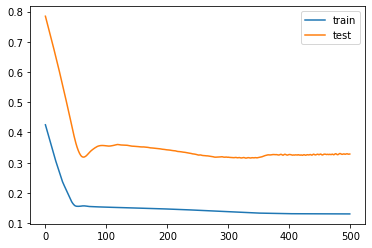

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

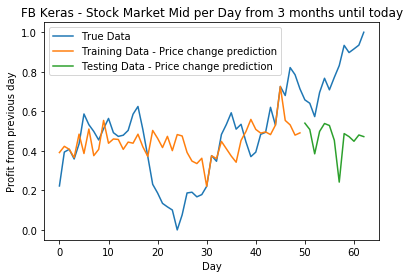

In [37]:
plt.plot(range(len(train_y)+len(test_y)) , list(np.array(train_y))+list(np.array(test_y)), range(len(train_y)), model.predict(train_X), '-', range(len(train_y), len(train_y)+len(test_y)), model.predict(test_X), '-')
plt.xlabel('Day')
plt.ylabel('Profit from previous day')
plt.title('FB Keras - Stock Market Mid per Day from 3 months until today')
plt.legend(["True Data","Training Data - Price change prediction", "Testing Data - Price change prediction"])
plt.show()

In [38]:
df_stocks['microsoft']

,times,open,high,low,close,volume
0,2019-11-27,152.33,152.50,151.5200,152.32,15123806.0
1,2019-11-26,151.36,152.42,151.3200,152.03,24635100.0
2,2019-11-25,150.00,151.35,149.9200,151.23,22428585.0
3,2019-11-22,150.07,150.30,148.8200,149.59,15841680.0
4,2019-11-21,149.40,149.80,148.5010,149.48,18576083.0
...,...,...,...,...,...,...
95,2019-07-16,138.96,139.05,136.5200,137.08,22726128.0
96,2019-07-15,139.44,139.54,138.4600,138.90,16651457.0
97,2019-07-12,138.85,139.13,138.0099,138.90,18936832.0
98,2019-07-11,138.20,139.22,137.8700,138.40,22327942.0


In [39]:
df_msft = df_stocks['microsoft'][['high', 'low']].iloc[::-1]
df_msft['mid'] = (df_msft['high'] + df_msft['low']) /2

In [40]:
sc = MinMaxScaler(feature_range = (0, 1))
data_set_scaled = sc.fit_transform(df_msft[['high', 'low', 'mid']])

In [41]:
train = data_set_scaled[:50, :]
test = data_set_scaled[50:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(50, 1, 2) (50,) (50, 1, 2) (50,)


In [42]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [43]:
history = model.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 50 samples, validate on 50 samples
Epoch 1/500
 - 1s - loss: 0.2611 - val_loss: 0.5294
Epoch 2/500
 - 0s - loss: 0.2564 - val_loss: 0.5229
Epoch 3/500
 - 0s - loss: 0.2516 - val_loss: 0.5163
Epoch 4/500
 - 0s - loss: 0.2469 - val_loss: 0.5097
Epoch 5/500
 - 0s - loss: 0.2422 - val_loss: 0.5032
Epoch 6/500
 - 0s - loss: 0.2375 - val_loss: 0.4966
Epoch 7/500
 - 0s - loss: 0.2327 - val_loss: 0.4901
Epoch 8/500
 - 0s - loss: 0.2280 - val_loss: 0.4835
Epoch 9/500
 - 0s - loss: 0.2233 - val_loss: 0.4770
Epoch 10/500
 - 0s - loss: 0.2186 - val_loss: 0.4704
Epoch 11/500
 - 0s - loss: 0.2138 - val_loss: 0.4638
Epoch 12/500
 - 0s - loss: 0.2091 - val_loss: 0.4572
Epoch 13/500
 - 0s - loss: 0.2043 - val_loss: 0.4506
Epoch 14/500
 - 0s - loss: 0.1995 - val_loss: 0.4440
Epoch 15/500
 - 0s - loss: 0.1947 - val_loss: 0.4374
Epoch 16/500
 - 0s - loss: 0.1899 - val_loss: 0.4307
Epoch 17/500
 - 0s - loss: 0.1852 - val_loss: 0.4240
Epoch 18/500
 - 0s - loss: 0.1805 - val_loss: 0.4173
Epoch 19/50

Epoch 154/500
 - 0s - loss: 0.0277 - val_loss: 0.0847
Epoch 155/500
 - 0s - loss: 0.0274 - val_loss: 0.0835
Epoch 156/500
 - 0s - loss: 0.0271 - val_loss: 0.0823
Epoch 157/500
 - 0s - loss: 0.0268 - val_loss: 0.0810
Epoch 158/500
 - 0s - loss: 0.0264 - val_loss: 0.0796
Epoch 159/500
 - 0s - loss: 0.0261 - val_loss: 0.0780
Epoch 160/500
 - 0s - loss: 0.0258 - val_loss: 0.0766
Epoch 161/500
 - 0s - loss: 0.0255 - val_loss: 0.0753
Epoch 162/500
 - 0s - loss: 0.0251 - val_loss: 0.0740
Epoch 163/500
 - 0s - loss: 0.0248 - val_loss: 0.0727
Epoch 164/500
 - 0s - loss: 0.0245 - val_loss: 0.0712
Epoch 165/500
 - 0s - loss: 0.0241 - val_loss: 0.0697
Epoch 166/500
 - 0s - loss: 0.0238 - val_loss: 0.0683
Epoch 167/500
 - 0s - loss: 0.0234 - val_loss: 0.0668
Epoch 168/500
 - 0s - loss: 0.0231 - val_loss: 0.0653
Epoch 169/500
 - 0s - loss: 0.0227 - val_loss: 0.0638
Epoch 170/500
 - 0s - loss: 0.0224 - val_loss: 0.0622
Epoch 171/500
 - 0s - loss: 0.0220 - val_loss: 0.0607
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0018 - val_loss: 0.0246
Epoch 307/500
 - 0s - loss: 0.0018 - val_loss: 0.0243
Epoch 308/500
 - 0s - loss: 0.0018 - val_loss: 0.0238
Epoch 309/500
 - 0s - loss: 0.0018 - val_loss: 0.0240
Epoch 310/500
 - 0s - loss: 0.0017 - val_loss: 0.0241
Epoch 311/500
 - 0s - loss: 0.0017 - val_loss: 0.0238
Epoch 312/500
 - 0s - loss: 0.0017 - val_loss: 0.0234
Epoch 313/500
 - 0s - loss: 0.0018 - val_loss: 0.0237
Epoch 314/500
 - 0s - loss: 0.0017 - val_loss: 0.0237
Epoch 315/500
 - 0s - loss: 0.0017 - val_loss: 0.0235
Epoch 316/500
 - 0s - loss: 0.0017 - val_loss: 0.0231
Epoch 317/500
 - 0s - loss: 0.0017 - val_loss: 0.0235
Epoch 318/500
 - 0s - loss: 0.0017 - val_loss: 0.0236
Epoch 319/500
 - 0s - loss: 0.0017 - val_loss: 0.0232
Epoch 320/500
 - 0s - loss: 0.0017 - val_loss: 0.0227
Epoch 321/500
 - 0s - loss: 0.0017 - val_loss: 0.0229
Epoch 322/500
 - 0s - loss: 0.0017 - val_loss: 0.0229
Epoch 323/500
 - 0s - loss: 0.0017 - val_loss: 0.0227
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0010 - val_loss: 0.0116
Epoch 459/500
 - 0s - loss: 0.0010 - val_loss: 0.0112
Epoch 460/500
 - 0s - loss: 9.9962e-04 - val_loss: 0.0110
Epoch 461/500
 - 0s - loss: 0.0010 - val_loss: 0.0115
Epoch 462/500
 - 0s - loss: 0.0010 - val_loss: 0.0114
Epoch 463/500
 - 0s - loss: 0.0010 - val_loss: 0.0108
Epoch 464/500
 - 0s - loss: 9.8267e-04 - val_loss: 0.0109
Epoch 465/500
 - 0s - loss: 9.6876e-04 - val_loss: 0.0107
Epoch 466/500
 - 0s - loss: 9.6132e-04 - val_loss: 0.0108
Epoch 467/500
 - 0s - loss: 9.5835e-04 - val_loss: 0.0106
Epoch 468/500
 - 0s - loss: 9.5579e-04 - val_loss: 0.0109
Epoch 469/500
 - 0s - loss: 9.6619e-04 - val_loss: 0.0108
Epoch 470/500
 - 0s - loss: 9.5835e-04 - val_loss: 0.0104
Epoch 471/500
 - 0s - loss: 9.4501e-04 - val_loss: 0.0107
Epoch 472/500
 - 0s - loss: 9.4716e-04 - val_loss: 0.0106
Epoch 473/500
 - 0s - loss: 9.3954e-04 - val_loss: 0.0101
Epoch 474/500
 - 0s - loss: 9.3352e-04 - val_loss: 0.0104
Epoch 475/500
 - 0s - loss: 9.2876

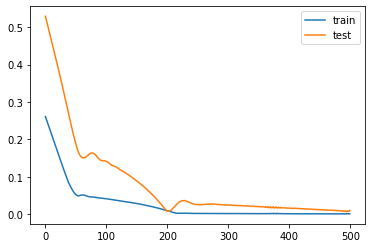

In [44]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

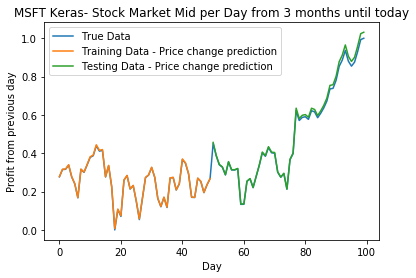

In [45]:
plt.plot(range(100) , list(np.array(train_y))+list(np.array(test_y)), range(50), model.predict(train_X), '-', range(50, 100), model.predict(test_X), '-')
plt.xlabel('Day')
plt.ylabel('Profit from previous day')
plt.title('MSFT Keras- Stock Market Mid per Day from 3 months until today')
plt.legend(["True Data","Training Data - Price change prediction", "Testing Data - Price change prediction"])
plt.show()

In [46]:
msft_names = [x for x in list(df.columns.values) if 'microsoft' in x]
df_msft_trends = df[msft_names]
stock_times = df_stocks['microsoft'].times
trends_times = list(df_msft_trends.index)
joint_times = list(set(stock_times) & set(trends_times)) 
df_stocks['microsoft'] = df_stocks['microsoft'].loc[df_stocks['microsoft']['times'].isin(joint_times)]
df_stocks['microsoft'] = df_stocks['microsoft'].reset_index()
print(df_stocks['microsoft'].head())
df_msft_trends = df_msft_trends.loc[df_msft_trends.index.isin(joint_times)]
df_msft_trends = df_msft_trends.reset_index()
df_msft_trends.columns = ['_'.join(x.split()) for x in list(df_msft_trends.columns) if len(x) > 1]
print(df_msft_trends.head())
df_msft = df_msft_trends.join(df_stocks['microsoft'])
df_msft['profit'] = df_msft['open']-df_msft['close']
df_msft = df_msft.iloc[::-1]
df_msft.head()

   index      times    open    high      low   close      volume
0      2 2019-11-25  150.00  151.35  149.920  151.23  22428585.0
1      3 2019-11-22  150.07  150.30  148.820  149.59  15841680.0
2      4 2019-11-21  149.40  149.80  148.501  149.48  18576083.0
3      5 2019-11-20  150.31  150.84  148.460  149.62  25720060.0
4      6 2019-11-19  150.88  151.33  150.195  150.39  23960164.0
        date  microsoft_report  microsoft_good  microsoft_bad  microsoft_up  \
0 2019-11-25                39              71             47            80   
1 2019-11-22                47              65             54            90   
2 2019-11-21                59              78             83            80   
3 2019-11-20                50              71             58            96   
4 2019-11-19                64              92             43            74   

   microsoft_down  microsoft_stock  
0              31               54  
1              31               54  
2              36       

,date,microsoft_report,microsoft_good,microsoft_bad,microsoft_up,microsoft_down,microsoft_stock,index,times,open,high,low,close,volume,profit
62,2019-08-28,55,66,40,88,41,41,64,2019-08-28,134.88,135.76,133.55,135.56,17343042.0,-0.68
61,2019-08-29,52,68,49,81,21,43,63,2019-08-29,137.25,138.44,136.91,138.12,20179716.0,-0.87
60,2019-08-30,43,79,56,80,22,40,62,2019-08-30,139.15,139.18,136.27,137.86,23946123.0,1.29
59,2019-09-03,61,69,39,87,28,32,61,2019-09-03,136.61,137.20,135.70,136.04,18880773.0,0.57
58,2019-09-04,59,67,44,82,41,34,60,2019-09-04,137.30,137.69,136.48,137.63,18015310.0,-0.33


In [48]:
cols = ['microsoft_'+ x for x in key_terms]
df_msft['mid'] = (df_fb['high'] + df_fb['low'])/2
df_msft[cols+['high', 'low']+['mid']]

,microsoft_report,microsoft_good,microsoft_bad,microsoft_up,microsoft_down,microsoft_stock,high,low,mid
62,55,66,40,88,41,41,135.76,133.550,180.4350
61,52,68,49,81,21,43,138.44,136.910,184.7726
60,43,79,56,80,22,40,139.18,136.270,185.1301
59,61,69,39,87,28,32,137.20,135.700,183.8900
58,59,67,44,82,41,34,137.69,136.480,185.8197
...,...,...,...,...,...,...,...,...,...
4,64,92,43,74,35,66,151.33,150.195,198.4300
3,50,71,58,96,88,67,150.84,148.460,197.5100
2,59,78,83,80,36,54,149.80,148.501,197.9750
1,47,65,54,90,31,54,150.30,148.820,198.4600


In [49]:
sc = MinMaxScaler(feature_range = (0, 1))
data_set_scaled = sc.fit_transform(df_msft[cols+['high', 'low', 'mid']])

In [50]:
train = data_set_scaled[:50, :]
test = data_set_scaled[50:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(50, 1, 8) (50,) (13, 1, 8) (13,)


In [51]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [52]:
history = model.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 50 samples, validate on 13 samples
Epoch 1/500
 - 1s - loss: 0.4987 - val_loss: 0.9215
Epoch 2/500
 - 0s - loss: 0.4872 - val_loss: 0.9068
Epoch 3/500
 - 0s - loss: 0.4758 - val_loss: 0.8920
Epoch 4/500
 - 0s - loss: 0.4644 - val_loss: 0.8774
Epoch 5/500
 - 0s - loss: 0.4530 - val_loss: 0.8627
Epoch 6/500
 - 0s - loss: 0.4417 - val_loss: 0.8481
Epoch 7/500
 - 0s - loss: 0.4308 - val_loss: 0.8335
Epoch 8/500
 - 0s - loss: 0.4199 - val_loss: 0.8189
Epoch 9/500
 - 0s - loss: 0.4091 - val_loss: 0.8043
Epoch 10/500
 - 0s - loss: 0.3983 - val_loss: 0.7897
Epoch 11/500
 - 0s - loss: 0.3874 - val_loss: 0.7751
Epoch 12/500
 - 0s - loss: 0.3766 - val_loss: 0.7605
Epoch 13/500
 - 0s - loss: 0.3662 - val_loss: 0.7458
Epoch 14/500
 - 0s - loss: 0.3559 - val_loss: 0.7312
Epoch 15/500
 - 0s - loss: 0.3455 - val_loss: 0.7165
Epoch 16/500
 - 0s - loss: 0.3352 - val_loss: 0.7017
Epoch 17/500
 - 0s - loss: 0.3252 - val_loss: 0.6870
Epoch 18/500
 - 0s - loss: 0.3157 - val_loss: 0.6720
Epoch 19/50

Epoch 154/500
 - 0s - loss: 0.1251 - val_loss: 0.0674
Epoch 155/500
 - 0s - loss: 0.1248 - val_loss: 0.0675
Epoch 156/500
 - 0s - loss: 0.1246 - val_loss: 0.0675
Epoch 157/500
 - 0s - loss: 0.1243 - val_loss: 0.0674
Epoch 158/500
 - 0s - loss: 0.1241 - val_loss: 0.0674
Epoch 159/500
 - 0s - loss: 0.1238 - val_loss: 0.0673
Epoch 160/500
 - 0s - loss: 0.1235 - val_loss: 0.0672
Epoch 161/500
 - 0s - loss: 0.1232 - val_loss: 0.0671
Epoch 162/500
 - 0s - loss: 0.1230 - val_loss: 0.0670
Epoch 163/500
 - 0s - loss: 0.1227 - val_loss: 0.0670
Epoch 164/500
 - 0s - loss: 0.1225 - val_loss: 0.0670
Epoch 165/500
 - 0s - loss: 0.1222 - val_loss: 0.0673
Epoch 166/500
 - 0s - loss: 0.1220 - val_loss: 0.0679
Epoch 167/500
 - 0s - loss: 0.1217 - val_loss: 0.0687
Epoch 168/500
 - 0s - loss: 0.1214 - val_loss: 0.0697
Epoch 169/500
 - 0s - loss: 0.1211 - val_loss: 0.0708
Epoch 170/500
 - 0s - loss: 0.1208 - val_loss: 0.0721
Epoch 171/500
 - 0s - loss: 0.1206 - val_loss: 0.0731
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0994 - val_loss: 0.2276
Epoch 307/500
 - 0s - loss: 0.0994 - val_loss: 0.2289
Epoch 308/500
 - 0s - loss: 0.0993 - val_loss: 0.2306
Epoch 309/500
 - 0s - loss: 0.0993 - val_loss: 0.2298
Epoch 310/500
 - 0s - loss: 0.0992 - val_loss: 0.2283
Epoch 311/500
 - 0s - loss: 0.0992 - val_loss: 0.2294
Epoch 312/500
 - 0s - loss: 0.0991 - val_loss: 0.2296
Epoch 313/500
 - 0s - loss: 0.0990 - val_loss: 0.2290
Epoch 314/500
 - 0s - loss: 0.0990 - val_loss: 0.2296
Epoch 315/500
 - 0s - loss: 0.0990 - val_loss: 0.2279
Epoch 316/500
 - 0s - loss: 0.0990 - val_loss: 0.2297
Epoch 317/500
 - 0s - loss: 0.0990 - val_loss: 0.2284
Epoch 318/500
 - 0s - loss: 0.0989 - val_loss: 0.2279
Epoch 319/500
 - 0s - loss: 0.0989 - val_loss: 0.2307
Epoch 320/500
 - 0s - loss: 0.0989 - val_loss: 0.2293
Epoch 321/500
 - 0s - loss: 0.0988 - val_loss: 0.2289
Epoch 322/500
 - 0s - loss: 0.0988 - val_loss: 0.2308
Epoch 323/500
 - 0s - loss: 0.0989 - val_loss: 0.2304
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0968 - val_loss: 0.2437
Epoch 459/500
 - 0s - loss: 0.0970 - val_loss: 0.2447
Epoch 460/500
 - 0s - loss: 0.0968 - val_loss: 0.2487
Epoch 461/500
 - 0s - loss: 0.0964 - val_loss: 0.2547
Epoch 462/500
 - 0s - loss: 0.0970 - val_loss: 0.2544
Epoch 463/500
 - 0s - loss: 0.0969 - val_loss: 0.2485
Epoch 464/500
 - 0s - loss: 0.0964 - val_loss: 0.2455
Epoch 465/500
 - 0s - loss: 0.0967 - val_loss: 0.2459
Epoch 466/500
 - 0s - loss: 0.0967 - val_loss: 0.2491
Epoch 467/500
 - 0s - loss: 0.0964 - val_loss: 0.2551
Epoch 468/500
 - 0s - loss: 0.0967 - val_loss: 0.2555
Epoch 469/500
 - 0s - loss: 0.0967 - val_loss: 0.2509
Epoch 470/500
 - 0s - loss: 0.0963 - val_loss: 0.2482
Epoch 471/500
 - 0s - loss: 0.0966 - val_loss: 0.2487
Epoch 472/500
 - 0s - loss: 0.0965 - val_loss: 0.2522
Epoch 473/500
 - 0s - loss: 0.0962 - val_loss: 0.2571
Epoch 474/500
 - 0s - loss: 0.0966 - val_loss: 0.2572
Epoch 475/500
 - 0s - loss: 0.0966 - val_loss: 0.2530
Epoch 476/500
 - 0s - loss: 

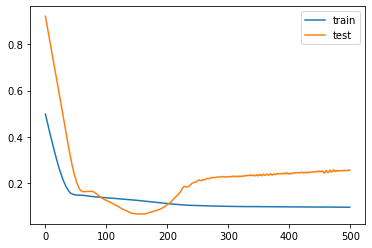

In [53]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

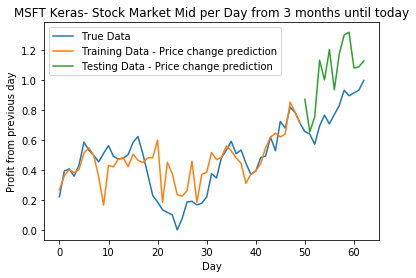

In [55]:
plt.plot(range(len(train_y)+len(test_y)) , list(np.array(train_y))+list(np.array(test_y)), range(50), model.predict(train_X), '-', range(50, len(train_y)+len(test_y)), model.predict(test_X), '-')
plt.xlabel('Day')
plt.ylabel('Profit from previous day')
plt.title('MSFT Keras- Stock Market Mid per Day from 3 months until today')
plt.legend(["True Data","Training Data - Price change prediction", "Testing Data - Price change prediction"])
plt.show()